# Deep learning based time series classification in aeon

There are a range of deep learning based classification algorithms in the toolkit.
The networks that are common to classification, regression and clustering are in the
`networks` module. Our deep learning classifiers are based those used in deep
learning bake off [1] and recent experimentation [2]. [3] provides an extensive recent
review of related deep learning work.


A list of all deep learning classifiers

In [5]:
import warnings

from aeon.registry import all_estimators

warnings.filterwarnings("ignore")
all_estimators("classifier", filter_tags={"algorithm_type": "deeplearning"})

[('CNNClassifier', aeon.classification.deep_learning._cnn.CNNClassifier),
 ('EncoderClassifier',
  aeon.classification.deep_learning._encoder.EncoderClassifier),
 ('FCNClassifier', aeon.classification.deep_learning._fcn.FCNClassifier),
 ('InceptionTimeClassifier',
  aeon.classification.deep_learning._inception_time.InceptionTimeClassifier),
 ('IndividualInceptionClassifier',
  aeon.classification.deep_learning._inception_time.IndividualInceptionClassifier),
 ('IndividualLITEClassifier',
  aeon.classification.deep_learning._lite_time.IndividualLITEClassifier),
 ('LITETimeClassifier',
  aeon.classification.deep_learning._lite_time.LITETimeClassifier),
 ('MLPClassifier', aeon.classification.deep_learning._mlp.MLPClassifier),
 ('ResNetClassifier',
  aeon.classification.deep_learning._resnet.ResNetClassifier),
 ('TapNetClassifier',
  aeon.classification.deep_learning._tapnet.TapNetClassifier)]

The use case for deep learning classifiers is identical to that of all classifiers.
However, you need to have tensorflow installed in your
environment. If you have a GPU correctly installed the classifiers should use them,
although it is worth checking the output.


In [6]:
from sklearn.metrics import accuracy_score

from aeon.classification.deep_learning import CNNClassifier
from aeon.datasets import load_basic_motions  # multivariate dataset
from aeon.datasets import load_italy_power_demand  # univariate dataset

italy, italy_labels = load_italy_power_demand(split="train")
italy_test, italy_test_labels = load_italy_power_demand(split="test")
motions, motions_labels = load_basic_motions(split="train")
motions_test, motions_test_labels = load_basic_motions(split="train")
cnn = CNNClassifier()
cnn.fit(italy, italy_labels)
y_pred = cnn.predict(italy_test)
accuracy_score(italy_test_labels, y_pred)

65/65 [==============================] - 0s 726us/step


0.9533527696793003

### Classifier Details

The deep learning bake off [1] found that the Residual Network (ResNet) was the best
performing architecture for TSC. ResNet has the following network structure.


<img src="./img/resnet.png" width="600" alt="ROCKET.">

The InceptionTime deep learning algorithm Subsequent to [1],
InceptionTime is an ensemble of five SingleInceptionTime deep learning
classifiers. Each base classifier shares the same architecture based on
Inception modules. Diversity is achieved through randomly intialising weights.
A SingleInceptionTimeClassifier has the following structure.

<img src="./img/inception_module.png" width="600" alt="ROCKET.">

A SingleInceptionTimeClassifier is structured as follows.

<img src="./img/inception.png" width="600" alt="ROCKET.">

## Performance on the UCR univariate datasets
You can find the dictionary based classifiers as follows. Please note we have not
fully evaluated all the deep learners yet, they take a long time to run.

In [1]:
from aeon.registry import all_estimators

est = all_estimators("classifier", filter_tags={"algorithm_type": "deeplearning"})
for c in est:
    print(c)

('CNNClassifier', <class 'aeon.classification.deep_learning._cnn.CNNClassifier'>)
('EncoderClassifier', <class 'aeon.classification.deep_learning._encoder.EncoderClassifier'>)
('FCNClassifier', <class 'aeon.classification.deep_learning._fcn.FCNClassifier'>)
('InceptionTimeClassifier', <class 'aeon.classification.deep_learning._inception_time.InceptionTimeClassifier'>)
('IndividualInceptionClassifier', <class 'aeon.classification.deep_learning._inception_time.IndividualInceptionClassifier'>)
('IndividualLITEClassifier', <class 'aeon.classification.deep_learning._lite_time.IndividualLITEClassifier'>)
('LITETimeClassifier', <class 'aeon.classification.deep_learning._lite_time.LITETimeClassifier'>)
('MLPClassifier', <class 'aeon.classification.deep_learning._mlp.MLPClassifier'>)
('ResNetClassifier', <class 'aeon.classification.deep_learning._resnet.ResNetClassifier'>)
('TapNetClassifier', <class 'aeon.classification.deep_learning._tapnet.TapNetClassifier'>)


In [4]:
from aeon.benchmarking import get_estimator_results_as_array
from aeon.datasets.tsc_data_lists import univariate

names = [t[0] for t in est]
# Not doen these yet
names.remove("EncoderClassifier")
names.remove("FCNClassifier")
names.remove("IndividualInceptionClassifier")
names.remove("IndividualLITEClassifier")
names.remove("MLPClassifier")
names.remove("TapNetClassifier")  # Multivariate only


results, present_names = get_estimator_results_as_array(
    names, univariate, include_missing=False
)
results.shape

(112, 4)

(<Figure size 600x230 with 1 Axes>, <Axes: >)

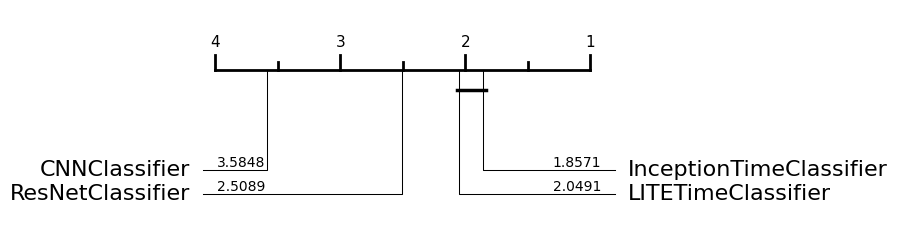

In [5]:
from aeon.visualisation import plot_boxplot_median, plot_critical_difference

plot_critical_difference(results, names)

(<Figure size 1000x600 with 1 Axes>, <Axes: >)

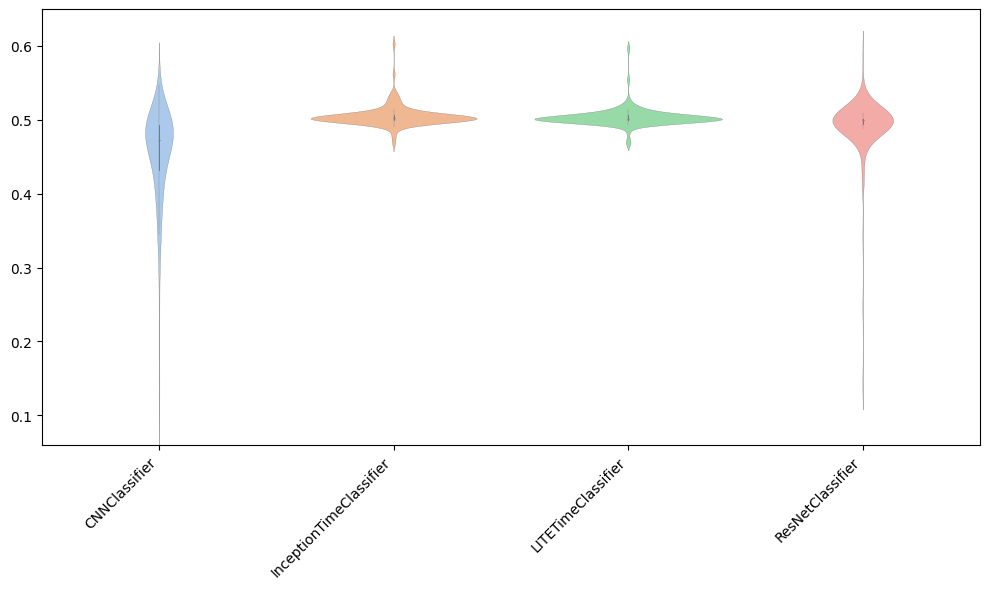

In [6]:
plot_boxplot_median(results, names)

## References

[1] Fawaz et al. (2019) "Deep learning for time series classification: a review" Data
 Mining and Knowledge Discovery. 33(4): 917-963

[2] Fawaz et al. (2020) "InceptionTime: finding AlexNet for time series classification.
Data Mining and Knowledge Discovery. 34(6): 1936-1962

[3] Foumani et al. (2023) "Deep Learning for Time Series Classification and Extrinsic
Regression: A Current Survey" ArXiv https://arxiv.org/pdf/2302.02515.pdf

[4]  https://github.com/MSD-IRIMAS/CF-4-TSC